In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))


In [2]:
# 모듈 임포트 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#  한글글꼴로 변경
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

# QUIZ : 도미와 빙어 분류 (스케일링 활용)

- 1. 아래의 데이터 셋을 이용하여 사이킷런에서 제공되어지는 스케일러          StandardScaler()를 이용하여 데이터 전처리 후 모델을 생성하라 

- 훈련데이터 셋과 테스트 데이서셋 분리시 test_size = 0.2, random_state=11, stratify = y데이터로 하기
- 모델은 KNeighborsClassifier()를 이용

-- 2. 새로운 데이터(25,150)과 (9.5, 6.2)는 도미일까 빙어일까 예측(도미는 1, 빙어는 0)

In [3]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# fish_target에 대해서 배열 만들기
fish_target = np.concatenate((np.ones(35), np.zeros(14)))


fish_data = pd.DataFrame(columns=['fish_length', 'fish_weight', 'label'])


fish_data['fish_length'] = fish_length
fish_data['fish_weight'] = fish_weight


fish_data['label'] = fish_target
fish_data.sample(5)

,fish_length,fish_weight,label
6,29.7,500.0,1.0
32,39.5,925.0,1.0
30,38.5,920.0,1.0
26,35.0,720.0,1.0
48,15.0,19.9,0.0


In [4]:
# 2) StandardScaler 적용 

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
# 타겟 라벨값은 스케일링변환해서는 안된다. 
# 'fish_length', 'fish_weight' 만 변경 
# 넘파이 배열로 변환 
scaler.fit(fish_data[['fish_length', 'fish_weight']])
fish_data_scaled = scaler.transform(fish_data[['fish_length', 'fish_weight']])

fish_data_scaled[:3]

array([[-0.16326134, -0.62350364],
       [-0.07448421, -0.47571019],
       [-0.05475596, -0.32175867]])

In [5]:
# 데이타프레임으로 변경 
fish_df_scaled = pd.DataFrame(data=fish_data_scaled, columns=['fish_length', 'fish_weight'])
fish_df_scaled['label'] = fish_target
fish_df_scaled.head(3)

,fish_length,fish_weight,label
0,-0.163261,-0.623504,1.0
1,-0.074484,-0.475710,1.0
2,-0.054756,-0.321759,1.0


In [6]:
# 3) 훈련데이타 세트와 테스트 데이타세트 분리 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(fish_df_scaled[['fish_length', 'fish_weight']] , 
                                                    fish_df_scaled['label'] , 
                                                    test_size=0.2, 
                                                    random_state=11, 
                                                    stratify=fish_df_scaled['label'])

# 4) 모델 학습 
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
X_train.head(2)

,fish_length,fish_weight
20,0.685053,0.401813
42,-1.504782,-1.338147


In [8]:
# 테스트 확인
X_test.head(2)

,fish_length,fish_weight
4,0.191847,-0.044646
35,-1.702065,-1.347999


In [9]:
# 4) 테스트 세트에 대한 점수 확인
model_kn.score(X_train, y_train), model_kn.score(X_test, y_test)

(1.0, 1.0)

In [10]:
# 5) 새로운 데이터 (25, 150)은 도미일까 방어일까
new = [25, 150]
new_scaled = scaler.transform([new])
new_scaled

array([[-0.20271784, -0.90677444]])

In [11]:
model_kn.predict(new_scaled)

array([1.])

In [12]:
# 6) 새로운 데이터(9.5, 6.2)는 도미일까 빙어일까? 
new = [9.5, 6.2]
new_scaled = scaler.transform([new])
new_scaled

array([[-1.73165724, -1.349539  ]])

In [13]:
model_kn.predict(new_scaled)

array([0.])

In [14]:
# 만약 스케일링을 하지 않았다면? 
model_kn.predict([[9.5, 6.2]])

array([1.])

# 라벨 인코딩(Label Encoding)

```
사이킷런의 LabelEncoder 이용. 숫자 형태로 변경한다.
- 모듈 임포트 from sklrean.preprocessing import LabelEncoder

- 인코딩 객체 생성 encoder = LabelEncoder()

- 인코딩 객체 fit => 인코딩.fit(타겟 리스트) encoder.fit(items)

- 인코딩 객체 변환 및 저장 => 인코딩.transform(타겟리스트) labels = encoder.transform(items)

In [15]:
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

df = pd.DataFrame(np.array(items).reshape(-1,1), columns=['items'])
df.sort_values(by='items')

,items
0,TV
1,냉장고
6,믹서
7,믹서
4,선풍기
5,선풍기
2,전자렌지
3,컴퓨터


## LabelEncoder 활용
- from sklearn.preprocessing import LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder

print(dir(LabelEncoder))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'fit', 'fit_transform', 'get_params', 'inverse_transform', 'set_params', 'transform']


In [17]:
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 객체 생성 
encoder = LabelEncoder()

# 입력데이타를 인코더 객체 적용 
encoder.fit(items)

#인코딩된 결과 데이타를 변수에 저장 
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [18]:
# 데이타 리스트 화 
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 데이타프레임화
df = pd.DataFrame(np.array(items).reshape(-1,1), columns=['items'])

# 객체 생성
encoder = LabelEncoder()

# 입력데이타를 인코더 객체 적용
encoder.fit(items)

# 인코딩된 결과 데이타를 변수에 저장
labels = encoder.transform(items)

df['Label_encoder'] = labels

df

,items,Label_encoder
0,TV,0
1,냉장고,1
2,전자렌지,4
3,컴퓨터,5
4,선풍기,3
5,선풍기,3
6,믹서,2
7,믹서,2


# 원-핫 인코딩(One-Hot Encoding)

- 원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가해 고유값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식이다. 하나만 1로 변환, 최종 2차원으로 변환한다.

### 판다스의 get_dummies()를 이용한 원-핫 인코딩

- pd.get_dummies(데이터프레임[컬럼명])
- pd.get_dummies(데이터프레임)

In [19]:
items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

df = pd.DataFrame(np.array(items).reshape(-1,1), columns=['items'])
df

,items
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [20]:
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자렌지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


# 타이타닉 생존자 예측 

###  데이타셋 
교재에서 제공하는 타이타닉 데이타 이용
data/titanic_book.csv

###  각 피처 설명 
* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [21]:
titanic_df = pd.read_csv('data/titanic_book.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())

# null 결측치가 있는 피처 확인 - Age, Cabin, Embarked


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [23]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [24]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

##### NULL 컬럼들에 대한 처리 **

In [25]:
# 평균값으로 대체 
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


#### 각 피처의 값의 분포 value_counts()

In [26]:
titanic_df.head(2)
# category형은 Passengerld, sex, cabin, embarked 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [27]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


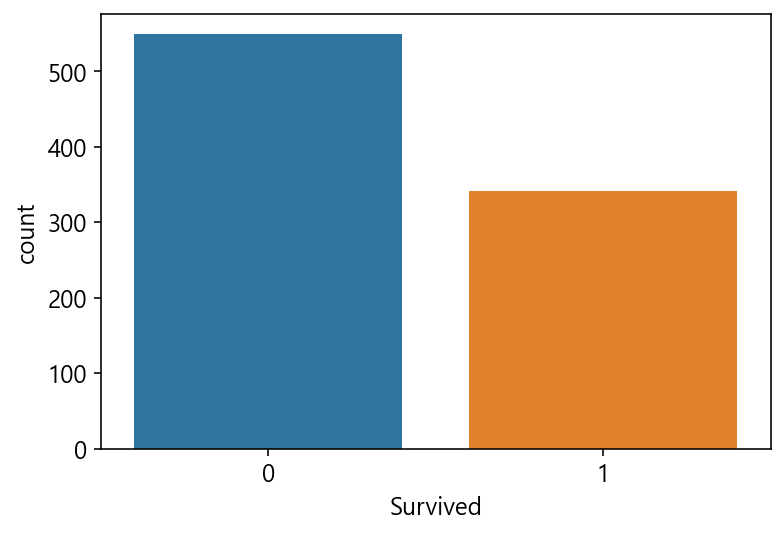

In [28]:
# 생존자와 사망자 시각화 
sns.countplot(x = 'Survived', data=titanic_df);

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

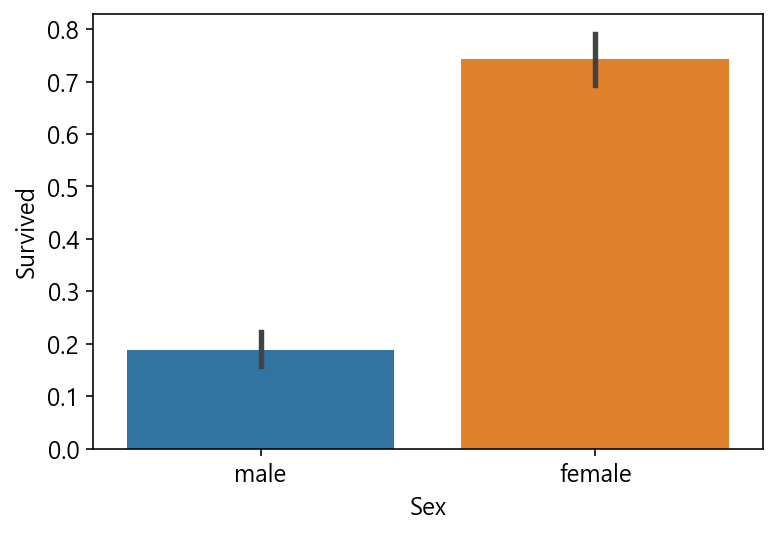

In [29]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

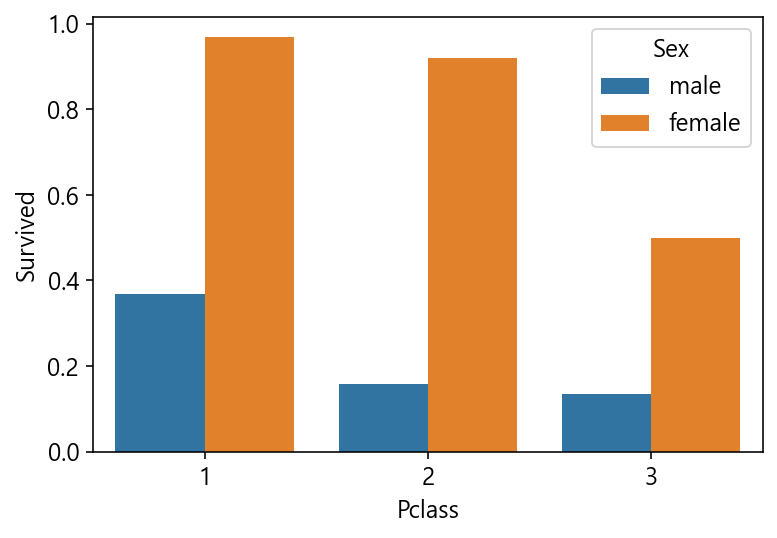

In [30]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', ci=False, data=titanic_df)

### Sex, Embarked  전처리 
- LabelEncoder()로 변환

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [33]:
# LabelEncoder 적용하기
encoder = LabelEncoder()

encoder.fit(titanic_df['Sex'])

temp = encoder.transform(titanic_df['Sex'])

titanic_df['Sex'] = temp.reshape(-1, 1)

In [34]:
# encoder = LabelEncoder()


# 입력데이타 적용
encoder.fit(titanic_df['Embarked'])

# temp로 저장
temp = encoder.transform(titanic_df['Embarked'])

titanic_df['Embarked'] = temp.reshape(-1, 1)

In [35]:
titanic_df['Embarked'].value_counts()

3    644
0    168
2     77
1      2
Name: Embarked, dtype: int64

In [36]:
titanic_df['Embarked'].value_counts()

3    644
0    168
2     77
1      2
Name: Embarked, dtype: int64

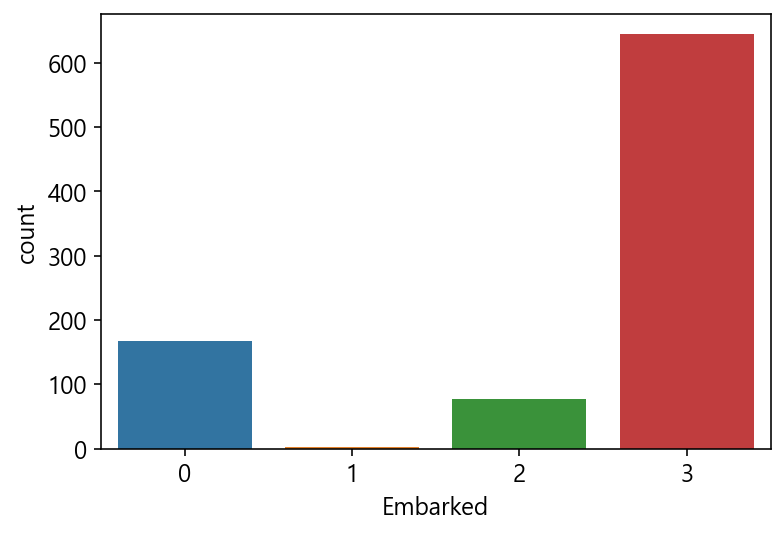

In [37]:
sns.countplot(x='Embarked', data=titanic_df);

### Cabin

In [38]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [39]:
encoder.fit(titanic_df['Cabin'])

temp = encoder.transform(titanic_df['Cabin'])

titanic_df['Cabin'] = temp.reshape(-1, 1)

titanic_df['Cabin'].value_counts()

7    687
2     59
1     47
3     33
4     32
0     15
5     13
6      4
8      1
Name: Cabin, dtype: int64

## 불필요한 컬럼 삭제 

In [40]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin            int32
Embarked         int32
dtype: object

In [41]:
# 불필요한 컬럼 삭제
titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

titanic_df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin         int32
Embarked      int32
dtype: object

### 학습데이타와 테스트데이타셋으로 분리

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [44]:
X_titanic_df = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked']]
y_titanic_df = titanic_df['Survived']

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11, stratify=y_titanic_df)

### 모델에 적용

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [47]:
model_kn = KNeighborsClassifier()
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=11)
model_rf = RandomForestClassifier(random_state=11)


# KNeighborsClassifier 학습/예측/평가
model_kn.fit(X_train , y_train)
print('\n========= KNeighbors' )
print('Train score : ' ,model_kn.score(X_train, y_train))
print('Test score : ' , model_kn.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_kn.predict(X_test)):.4f}')

# LogisticRegression 학습/예측/평가
model_lr.fit(X_train , y_train)
print('\n========= LogisticRegression' )
print('Train score : ' , model_lr.score(X_train, y_train))
print('Test score : ' , model_lr.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_lr.predict(X_test)):.4f}')

# DecisionTreeClassifier 학습/예측/평가
model_dt.fit(X_train , y_train)
print('\n========= DecisionTree' )
print('Train score : ' , model_dt.score(X_train, y_train))
print('Test score : ' , model_dt.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_dt.predict(X_test)):.4f}')

# RandomForest 학습/예측/평가
model_rf.fit(X_train , y_train)
print('\n========= RandomForest' )
print('Train score : ' , model_rf.score(X_train, y_train))
print('Test score : ' , model_rf.score(X_test, y_test))
print(f'정확도: {accuracy_score(y_test, model_rf.predict(X_test)):.4f}')



========= KNeighbors
Train score :  0.8019662921348315
Test score :  0.7374301675977654
정확도: 0.7374

========= LogisticRegression
Train score :  0.7935393258426966
Test score :  0.8268156424581006
정확도: 0.8268

========= DecisionTree
Train score :  0.9859550561797753
Test score :  0.7932960893854749
정확도: 0.7933

========= RandomForest
Train score :  0.9859550561797753
Test score :  0.8268156424581006
정확도: 0.8268


# Quiz

타이타닉 데이타셋에서 Age 컬럼을 아래의 함수를 이용하여 세분화하여 추가하고 원핫인코딩 형태 변경하여
<br> 모델의 데이타로 활용하여라. 

In [48]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

In [49]:
get_category(20)

'Student'

In [50]:
titanic_df['ex'] = titanic_df['Age'].apply(lambda x : get_category(x))


In [51]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ex
0,0,3,1,22.000000,1,0,7.2500,7,3,Student
1,1,1,0,38.000000,1,0,71.2833,2,0,Adult
2,1,3,0,26.000000,0,0,7.9250,7,3,Young Adult
3,1,1,0,35.000000,1,0,53.1000,2,3,Young Adult
4,0,3,1,35.000000,0,0,8.0500,7,3,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3,Young Adult
887,1,1,0,19.000000,0,0,30.0000,1,3,Student
888,0,3,0,29.699118,1,2,23.4500,7,3,Young Adult
889,1,1,1,26.000000,0,0,30.0000,2,0,Young Adult
